In [1]:
from __future__ import division

import collections
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.decomposition import PCA

## NN libs
import keras
from keras import backend as K
from keras import regularizers
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import TensorBoard

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# local libs
import config, models, setup, compression, ncd_evaluation
import midi
import midi.decode
from midi import generators as g
from utils import io, models_io, utils, plot, string
from capsule.layers import Capsule, Length
from capsule.capsulefunctions import squash, softmax, margin_loss

In [4]:
context = setup.init(max_bars=4)

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_timestesp = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]

Setting up params

max min f 20.0 0.25
 >> Context(max_t=4.0, dt=0.025, n_timesteps=160, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
 sample length:  160.000000
 max_f: 20.000000, min_f: 0.250000


In [5]:
n = 500 * 2
dim4 = True
multiTrack = True
reduce_dims = midi.ReduceDimsOptions.NONE # GLOBAL
dn = 'drum_midi/'
v = None # float | None
x_train, labels = setup.import_data(context, n, dim4=dim4, reduce_dims=reduce_dims, 
    dirname=dn, multiTrack=multiTrack, velocity=v, r=True)


Importing midi-data
walk_and_search(../datasets/drum_midi/)
path ../datasets/drum_midi/
path ../datasets/drum_midi/50´s Drummer MIDI Files
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM
  01 8th Hat.mid
  02 8th Ride.mid
  03 16th Snare.mid
  04 8th Ride.mid
  05 16th Ride.mid
  06 16th Ride.mid
  07 16th Ride.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM
  01 8th Hat.mid
  02 8th Snare.mid
  03 4th Snare .mid
  04 8th Ride.mid
  05 8th Snare.mid
  06 8th Toms.mid
  07 8th Toms.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/03 Lips n Hips 152BPM
  01 8th Perc.mid
  02 8th Ride.mid
  03 8th Ride .mid
  04 8th Snare.mid
  05 8th Snare.mid
  06 8th Hat.mid
  07 8th Snare.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/04 Maybelline 233BPM
  01 8th Snare.mid
  02 8th Cym.mid
  03 8th Ride.mid
  04 16t

path ../datasets/drum_midi/50´s Drummer MIDI Files/06 Soul - Funk
path ../datasets/drum_midi/50´s Drummer MIDI Files/06 Soul - Funk/01 Soul Groove 107BPM
  01 16th Hat.mid
  02 16th Hat.mid
  03 8th Hat.mid
  04 16th Hat.mid
  05 16th Hat.mid
  06 8th Hat.mid
  07 16th Hat.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/06 Soul - Funk/02 Boogaloo 120BPM
  01 16th Multi.mid
  02 4th Multi.mid
  03 16th Hat.mid
  04 4th Multi.mid
  05 8th Multi.mid
  06 16th Hat.mid
  07 8th Hat.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/06 Soul - Funk/03 Cadence Soul 105BPM
  01 4th Hat.mid
  02 4th Hat.mid
  03 8th Hat.mid
  04 4th Hat.mid
  05 4th Hat.mid
  06 8th Cym.mid
  07 8th Hat.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/06 Soul - Funk/04 GoGo Soul 100BPM
  01 16th Toms.mid
  02 16th Toms.mid
  03 8th Hat.mid
  04 8th Hat.mid
  05 8th Hat.mid
  06 8th Hat.mid
  07 8th Hat.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/06 Soul - Funk/05 Hip Hop 95BPM
  01 16

path ../datasets/drum_midi/60´s Drummer MIDI Files/Early Kit/03 Jazz/06 Baker 134BPM
  01 4th Ride.mid
  02 4th Ride.mid
  03 4th Ride.mid
  04 4th Ride.mid
  05 4th Ride.mid
  06 4th Ride Side.mid
  07 4th Ride Side.mid
  08 4th Ride Side.mid
  09 4th Ride.mid
  10 4th Ride.mid
  11 4th Ride.mid
  12 4th Ride.mid
  13 4th Ride Toms.mid
  14 4th Ride Toms.mid
  15 4th Ride Toms.mid
path ../datasets/drum_midi/60´s Drummer MIDI Files/Early Kit/03 Jazz/07 Benson 125BPM 3-4
  01 4th Ride.mid
  02 4th Ride.mid
  03 4th Ride.mid
  04 4th Ride.mid
  05 4th Ride Side.mid
  06 4th Ride Side.mid
  07 4th Ride.mid
  08 4th Ride.mid
  09 4th Ride.mid
  10 4th Ride.mid
  11 4th Ride.mid
  12 4th Ride.mid
  13 4th Ride Toms.mid
  14 4th Ride Toms.mid
  15 4th Ride.mid
path ../datasets/drum_midi/60´s Drummer MIDI Files/Early Kit/03 Jazz/08 Bogan 222BPM
  01 8th Toms.mid
  02 8th Toms.mid
  03 8th Toms Hat.mid
  04 8th Toms Hat.mid
  05 8th Toms Hat.mid
  06 8th Toms Hat.mid
  07 8th Toms Hat.mid
  08

In [6]:
genres = [string.extract_labels_from_filename(k) for k in labels]
# genre_dict = setup.build_label_dict(genres)

In [7]:
[(i,k) for i,k in enumerate(labels)]

[(0,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/01 8th Hat.mid"),
 (1,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/02 8th Ride.mid"),
 (2,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/03 16th Snare.mid"),
 (3,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/04 8th Ride.mid"),
 (4,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/05 16th Ride.mid"),
 (5,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/06 16th Ride.mid"),
 (6,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/07 16th Ride.mid"),
 (7,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM/01 8th Hat.mid"),
 (8,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM/02 8th Snare.mid"),
 (9,
  "../datasets/

In [8]:
genres[0][-2:]

["01 Rock'n'Roll", '01 Dancin Rick 166BPM']

In [9]:
dn = config.dataset_dir + 'drum_midi/' + '50´s Drummer MIDI Files'
# for a in os.walk(config.dataset_dir + 'drum_midi'):
#     print(a)
sorted(os.listdir(dn))

['.DS_Store',
 "01 Rock'n'Roll",
 '02 Blues',
 '03 Traditional Pop',
 '04 Country',
 '05 Jazz',
 '06 Soul - Funk',
 '07 Indie']

In [10]:
unique_genres = set(genre[-2] +'/'+ genre[-1] for genre in genres)
len(unique_genres)

110

In [11]:
unique_genres

{'01 Rock n Roll/01 Shuffle 186BPM',
 '01 Rock n Roll/02 Straight 150BPM',
 '01 Rock n Roll/03 Chucky 140BPM',
 '01 Rock n Roll/04 Deddley 150BPM',
 '01 Rock n Roll/05 Diamond 164BPM',
 '01 Rock n Roll/06 Swingin 132BPM Triplets',
 '01 Rock n Roll/07 Domino 167BPM',
 '01 Rock n Roll/08 Offkick 182BPM',
 '01 Rock n Roll/09 Rumblin 192BPM Triplets',
 '01 Rock n Roll/10 Uptime 112BPM',
 "01 Rock'n'Roll/01 Dancin Rick 166BPM",
 "01 Rock'n'Roll/02 Gogo 191BPM",
 "01 Rock'n'Roll/03 Lips n Hips 152BPM",
 "01 Rock'n'Roll/04 Maybelline 233BPM",
 "01 Rock'n'Roll/05 Straight Line 136BPM",
 "01 Rock'n'Roll/06 Moonglow 140BPM",
 "01 Rock'n'Roll/07 Thwag 170BPM",
 "01 Rock'n'Roll/08 Doowoop 140bpm",
 "01 Rock'n'Roll/09 Diddeley 185bpm",
 "01 Rock'n'Roll/10 Ottis 172bpm",
 '02 Blues Rock/01 Clutch 90BPM Triplets',
 '02 Blues Rock/02 Sixeight 58BPM',
 '02 Blues Rock/03 Fire 148BPM',
 '02 Blues Rock/04 Whiteroom 112BPM',
 '02 Blues Rock/05 Bluesshuffle 116BPM',
 '02 Blues Rock/06 Straight 130BPM',
 '02

In [12]:
x_train.shape

(1000, 160, 10, 1)

In [13]:
m = int(x_train.shape[0] * 0.9)
x_train.shape, m

((1000, 160, 10, 1), 900)

In [14]:
x_test = x_train[m:]
x_train = x_train[:m]

In [15]:
# genres = [string.extract_labels_from_filename(k) for k in labels]
genre_dict = setup.build_label_dict(genres[:m])

In [16]:
# i = 0
# j = 399
# plot.single(x_train[i, :50,:,0])
# plot.single(x_train[j, :50,:,0])
# # plot.single(x_train[2a, :50,:,0])
# np.array(labels)[[i,j]]

In [17]:
input_shape = x_train[0].shape
timesteps = input_shape[0]
notes = input_shape[1]
input_shape

(160, 10, 1)

In [18]:
latent_dim = 10
epsilon_std = 1.0

In [19]:
vae, encoder, generator = models.build(input_shape, latent_dim)

/Users/mark/src/pattern-recognition/src/models.py:81: UserWarning: Output "reshape_2" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "reshape_2" during training.
  vae.compile(optimizer='adam')


In [20]:
batch_size = 128
epochs = 500
params = {'batch_size': batch_size, 'return_y': False}

In [21]:
# phase_mod = 0.01
# whitening = False

In [22]:
# m = 1000
# useDataGenerator = False
# # useDataGenerator = True
# callbacks = [TensorBoard(log_dir=config.tmp_log_dir)]

# x = x_train[:m]
# # x = x_train
# # i = [0,1, 7,8, 14,15, 399,400]
# # x = x_train[i]
# # x = np.concatenate([x for _ in range(10)])
# print('x:', x.shape)

# print('batch_size: %i' % batch_size)
# print('update-iterations:', round(epochs * x.shape[0] / batch_size))
# if useDataGenerator:
#     datagen = models.ImageDataGenerator(x_train, batch_size, phase_mod, whitening)
#     history = collections.defaultdict(list)
#     n_batches = datagen.__len__()
#     for e in range(epochs):
#         print('\n[Epoch %i/%i] >>>>>>>>>' % (e, epochs))
#         for batch_i, (x_batch, y_batch) in enumerate(datagen.flow(x, x, batch_size)):
#             print(' Batch %i/%i' % (batch_i,n_batches))
#             x_ = x_batch
#             # x_ = datagen.shuffle_3rd_dim(x_)
#             # x_ = datagen.shuffle_3rd_dim_soft(x_, rate=0.5, scale=0.1, verbose=0)
#             h = vae.fit(x_, validation_data=(x_test, None), verbose=0)
#             for k,v in h.history.items(): 
#                 print(' \\_%s' % k, [round(v_,) for v_ in v])
#                 history[k].append(v)
#             if batch_i >= n_batches:
#                 break
# else:
#     h = vae.fit(x, epochs=epochs, validation_data=(x_test, None), callbacks=callbacks)
#     history = h.history

In [23]:
fn = config.model_dir + 'hi_res-v3p-4_vae.h5'
# fn = config.model_dir + 'hi_res2c_vae.h5'

In [24]:
# io.save_dict('../logs/','train_loss', history)

In [25]:
# # for suffix, model in [('vae',vae), ('encoder',encoder), ('gen',generator)]:
# #     model.save_weights(dn + prefix + suffix + '.h5', "w")
# vae.save_weights(fn, "w")

In [26]:
vae.load_weights(fn)

In [27]:
# plt.plot(history['loss'])
# plt.plot(history['val_loss'])
# plt.ylim(0,150)

m (50, 10, 1)


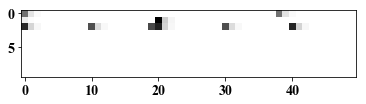

m (50, 10, 1)


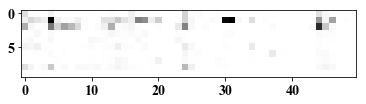

m (50, 10, 1)


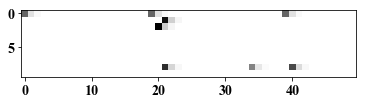

m (50, 10, 1)


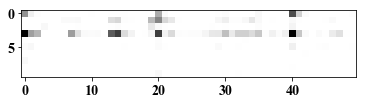

In [28]:
i,j = 0, 10
m = 50
y = vae.predict(x_train[:500])
plot.single(x_train[i,:m])
plot.single(y[i,:m])
plot.single(x_train[j,:m])
plot.single(y[j,:m])

In [29]:
# x = datagen.shuffle_3rd_dim_soft(x_train[:10], rate=1, intensity=2, scale=1, verbose=1)
# i = 0
# plot.single(x_train[i,:,:,0])
# plot.single(x[i,:,:,0])
# x_ = vae.predict(x)
# plot.single(x_[i,:,:,0])

In [30]:
# # min: these pixels are 'always' active
# m = x.min(axis=0)
# plot.multi(m[:30,:,0])

In [31]:
# # mean
# m = x.mean(axis=0)
# plot.single(m[:30,:,0])

## Encoder + Decoder (generator)
A model to project inputs on the latent space

In [32]:
# # build a model to project inputs on the latent space
# encoder = Model(encoder_input, z_mean)

In [33]:
# generator_input = Input((latent_dim,))
# generator_layers_ = utils.composition(decoders, generator_input)
# generator = Model(generator_input, generator_layers_)

In [34]:
decoder = generator

## Style transfer

In [35]:
import sklearn.feature_selection
import sklearn.ensemble

In [36]:
# pca = PCA(n_components=3)
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# It uses the LAPACK implementation of the full SVD or a randomized truncated SVD by the method of Halko et al. 2009,
# depending on the shape of the input data and the number of components to extract.

In [37]:
m = 1000
x_train_encoded = encoder.predict(x_train[:m], batch_size=batch_size)
x_train_encoded.shape

(900, 10)

In [38]:
# a = list({3:[2],'s':[3,3]}.keys())
# np.random.shuffle(a)
# a

In [39]:
import transformation_extraction

In [ ]:
best_dims, importances, transformations, min_transformations = \
    transformation_extraction.between_genres(x_train_encoded, genre_dict, amt=50, v=1)


 Genre A: 07 Indie/11 Disco Dancer 135BPM
  genre B: 	03 Traditional Pop/08 Cecil Cee 101BPM (len: 7)
 	 i: 1, importance: 0.223660
  genre B: 	02 Blues Rock/08 Shuffle 119BPM Triplets (len: 15)
 	 i: 1, importance: 0.239792
  genre B: 	01 Rock'n'Roll/08 Doowoop 140bpm (len: 7)
 	 i: 7, importance: 0.237871
  genre B: 	04 Country/07 Trainy 100BPM (len: 7)
 	 i: 2, importance: 0.275342
  genre B: 	01 Rock'n'Roll/05 Straight Line 136BPM (len: 7)
 	 i: 7, importance: 0.214520
  genre B: 	03 Jazz/03 Gipsy 218BPM Triplets (len: 10)
 	 i: 7, importance: 0.199528
  genre B: 	02 Blues Rock/05 Bluesshuffle 116BPM (len: 15)
 	 i: 2, importance: 0.327671
  genre B: 	02 Blues/08 Sams 127BPM (len: 7)
 	 i: 1, importance: 0.170800
  genre B: 	03 Traditional Pop/10 Frewild 152BPM (len: 7)
 	 i: 9, importance: 0.247119
  genre B: 	06 Soul - Funk/05 Hip Hop 95BPM (len: 7)
 	 i: 2, importance: 0.228605
  genre B: 	01 Rock n Roll/10 Uptime 112BPM (len: 15)
 	 i: 0, importance: 0.203367
  genre B: 	05 Ja

  genre B: 	02 Blues Rock/09 Bluesballad 97BPM (len: 15)
 	 i: 2, importance: 0.363111

 Genre A: 03 Traditional Pop/02 Frankies Girl 116BPM
  genre B: 	07 Indie/10 Chilled 120BPM (len: 7)
 	 i: 2, importance: 0.181866
  genre B: 	02 Blues/01 Booze 92BPM (len: 7)
 	 i: 0, importance: 0.241669
  genre B: 	05 Jazz/05 TNT 116BPM (len: 7)
 	 i: 9, importance: 0.316081
  genre B: 	01 Rock n Roll/02 Straight 150BPM (len: 15)
 	 i: 1, importance: 0.194517
  genre B: 	04 Country/10 Rough Rider 183BPM (len: 7)
 	 i: 1, importance: 0.199973
  genre B: 	01 Rock'n'Roll/10 Ottis 172bpm (len: 7)
 	 i: 7, importance: 0.193664
  genre B: 	07 Indie/08 Bouncer 162BPM (len: 7)
 	 i: 9, importance: 0.159044
  genre B: 	01 Rock'n'Roll/01 Dancin Rick 166BPM (len: 7)
 	 i: 6, importance: 0.208397
  genre B: 	07 Indie/01 Rock Shuffle 130BPM (len: 7)
 	 i: 1, importance: 0.232961
  genre B: 	01 Rock n Roll/03 Chucky 140BPM (len: 15)
 	 i: 1, importance: 0.213987
  genre B: 	01 Rock'n'Roll/06 Moonglow 140BPM (l

  genre B: 	01 Rock'n'Roll/08 Doowoop 140bpm (len: 7)
 	 i: 7, importance: 0.223127
  genre B: 	06 Soul - Funk/03 Cadence Soul 105BPM (len: 7)
 	 i: 3, importance: 0.265422

 Genre A: 02 Blues Rock/04 Whiteroom 112BPM
  genre B: 	05 Jazz/10 Scalis 190BPM 3-4 (len: 7)
 	 i: 1, importance: 0.289382
  genre B: 	02 Blues/07 Straight 88BPM (len: 7)
 	 i: 2, importance: 0.351436
  genre B: 	06 Soul - Funk/06 JB Groove 115BPM (len: 7)
 	 i: 2, importance: 0.310813
  genre B: 	02 Blues/05 Cadillac 128BPM (len: 7)
 	 i: 2, importance: 0.278479
  genre B: 	05 Jazz/05 TNT 116BPM (len: 7)
 	 i: 2, importance: 0.296550
  genre B: 	02 Blues Rock/06 Straight 130BPM (len: 15)
 	 i: 2, importance: 0.371649
  genre B: 	05 Jazz/02 Another You 170BPM (len: 7)
 	 i: 0, importance: 0.344770
  genre B: 	05 Jazz/08 Neodop 226BPM 3-4 (len: 7)
 	 i: 4, importance: 0.221862
  genre B: 	02 Blues/06 Vidar Vega 70BPM (len: 7)
 	 i: 2, importance: 0.295644
  genre B: 	07 Indie/16 Medium Flow 120BPM (len: 7)
 	 i: 2,

  genre B: 	04 Country/03 Straight 72BPM Brushes (len: 7)
 	 i: 6, importance: 0.206143
  genre B: 	03 Jazz/01 Swing 150BPM Triplets (len: 15)
 	 i: 2, importance: 0.261301
  genre B: 	01 Rock n Roll/08 Offkick 182BPM (len: 15)
 	 i: 2, importance: 0.256071
  genre B: 	06 Soul - Funk/10 Syncopated Ride 128BPM (len: 7)
 	 i: 2, importance: 0.296493

 Genre A: 01 Rock n Roll/03 Chucky 140BPM
  genre B: 	01 Rock'n'Roll/04 Maybelline 233BPM (len: 7)
 	 i: 2, importance: 0.165975
  genre B: 	03 Traditional Pop/05 Your Eyes 80BPM (len: 7)
 	 i: 9, importance: 0.177093
  genre B: 	02 Blues Rock/09 Bluesballad 97BPM (len: 15)
 	 i: 2, importance: 0.433508
  genre B: 	06 Soul - Funk/04 GoGo Soul 100BPM (len: 7)
 	 i: 2, importance: 0.293736
  genre B: 	03 Jazz/02 Boogaloo 170BPM Triplets (len: 15)
 	 i: 5, importance: 0.201665
  genre B: 	04 Country/10 Rough Rider 183BPM (len: 7)
 	 i: 3, importance: 0.193251
  genre B: 	01 Rock'n'Roll/08 Doowoop 140bpm (len: 7)
 	 i: 2, importance: 0.431633
  

In [ ]:
print('avg importance: %f' % np.mean(importances))

In [ ]:
# list(min_transformations.items())[0]

In [ ]:
for genre_A, d in min_transformations.items():
    print('\nGenre `%s` to: \n dim:\tgenre:' % genre_A)
    for genre_B, vector in d.items():
        print(' %i \t%s' % (np.argmax(vector), genre_B))  

In [ ]:
plt.hist(best_dims)

In [ ]:
# TODO save as python object (or json)

In [ ]:
# def save_transformation_dicts(transformations={}, dn='', v=0):
#     for genre_A, sub_dict in transformations.items():
#         # sub_dict :: {'genre_B_2/genre_B_2': vector}
#         a1, a2 = genre_A.split('/')
#         if a1 not in os.listdir(dn): os.mkdir(dn + a1)
#         if v:
#             print(genre_A)
#             print(sub_dict.keys())
#         io.save_dict(dn + a1, a2, sub_dict)

fn = config.plots_dir + 'transformations-best_dims.pkl'
io.save(best_dims, fn)

fn = config.plots_dir + 'transformations.pkl'
io.save(transformations, fn)

fn = config.plots_dir + 'min_transformations.pkl'
io.save(min_transformations, fn)

In [ ]:
t_ = io.load(fn)

In [ ]:
# transformations = io.read_categorical_dict_dir(config.plots_dir + 'transformations/')
# min_transformations = io.read_categorical_dict_dir(config.plots_dir + 'min_transformations/') 

In [ ]:
list(transformations.keys())[:3]

In [ ]:
len(transformations.keys())